# Table of Contents

01 Importing Libraries <br/>
02 Importing Data <br/>
03 Data Prep for Regression Analysis <br/>
- Data Cleaning
- Preliminary Data Exploration
- Data Preparation <br/>

04 Regression Analysis

# 01 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 02 Importing Data

In [3]:
# Creating basic path
path = "A:\Python\World Happiness Project"

In [4]:
# Importing Merged World Happiness Report
df_whr_M = pd.read_csv(os.path.join(path, '02 Data' , 'Prepared Data', 'WHRMerged.csv'),index_col = False)

# 03 Data Prep for Regression Analysis

### Data Cleaning

In [22]:
# Check for missing values

df_whr_M.isnull().sum()

# No missing values to handle

Year                            0
Country                         0
Happiness Score                 0
GDP per Capita                  0
Social Support                  0
Healthy Life Expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of Corruption       0
dtype: int64

In [25]:
# Checking for Duplicate Values
dups = df_whr_M.duplicated()

In [24]:
dups.shape

(1230,)

No Duplicates found

C:\Users\Rajit\AppData\Local\Temp\ipykernel_5488\407282506.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_whr_M['GDP per Capita'], bins=25) # Shows extreme values


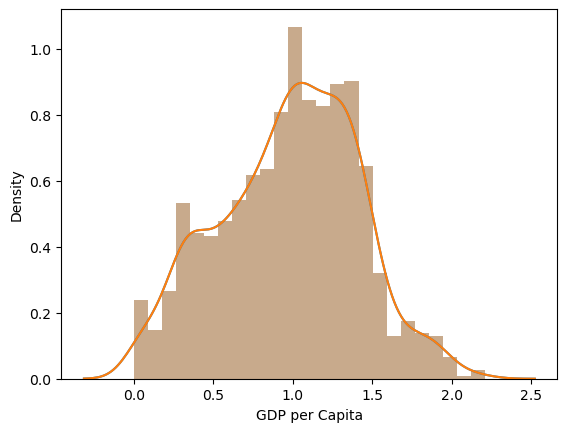

In [27]:
sns.distplot(df_whr_M['GDP per Capita'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.
plt.show()

No Extreme Values found in my opinion

In [28]:
# Check mean for GDP per Capita
df_whr_M['GDP per Capita'].mean()

0.9762545653130081

In [29]:
# Check max for GDP per Capita
df_whr_M['GDP per Capita'].max()

2.209

In [30]:
# Check median for GDP per Capita
df_whr_M['GDP per Capita'].median()

1.01358

### Preliminary Data Exploration

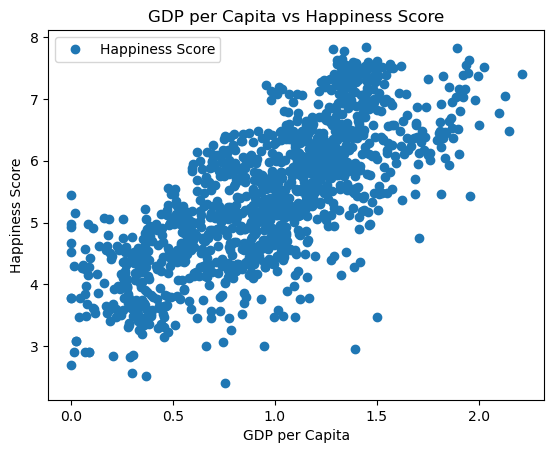

In [5]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_whr_M.plot(x = 'GDP per Capita', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP per Capita vs Happiness Score')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness Score')  
plt.show()

**Hypothesis:** As GDP per Capita increases, I expect Happiness Score to increase <br/>
From our correlation chart above we also have a pretty strong positive correlation to further support this idea, but lets do regression analysis to verify this hypothesis.

### Data Preparation

In [11]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_whr_M['GDP per Capita'].values.reshape(-1,1)
Y = df_whr_M['Happiness Score'].values.reshape(-1,1)

In [8]:
X

array([[1.39651],
       [1.30232],
       [1.32548],
       ...,
       [0.947  ],
       [1.392  ],
       [0.758  ]])

In [12]:
Y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [2.995],
       [2.955],
       [2.404]])

In [13]:
# Split data into a training set and a test set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 04 Regression Analysis

In [14]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [15]:
# Fit the regression object onto the training set.

regression.fit(X_train, Y_train)

LinearRegression()

In [16]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

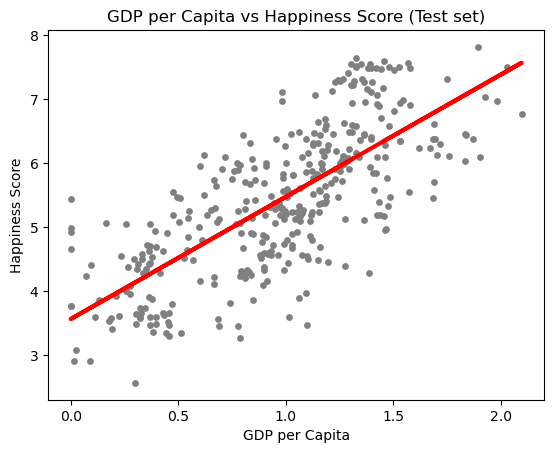

In [17]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, Y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

**Interpretation of Chart**: I would say the regression line fits pretty well onto the chart. It's centered well on the scatterplot and follows the trend.

In [18]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(Y_test, y_predicted) # This is the mean squared error
r2 = r2_score(Y_test, y_predicted) # This is the R2 score. 

In [19]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.91168828]]
Mean squared error:  0.5968761144220216
R2 score:  0.5339226360568083


### Viewing Y Predicted Array

In [20]:
y_predicted

array([[6.06605688],
       [5.89350731],
       [4.54304517],
       [5.76053086],
       [5.72243113],
       [5.19731614],
       [6.79475422],
       [5.01850905],
       [5.32275424],
       [5.09526334],
       [6.03246852],
       [5.98037501],
       [4.17755737],
       [4.71056204],
       [5.75905886],
       [5.98037501],
       [4.61925295],
       [6.10262466],
       [7.2057672 ],
       [5.07996983],
       [4.06103997],
       [6.19639579],
       [5.30513707],
       [5.40961051],
       [4.53705036],
       [7.24400097],
       [5.08039279],
       [6.10177029],
       [5.53495164],
       [5.45848411],
       [5.45083736],
       [5.82743995],
       [6.24801137],
       [5.38966333],
       [5.05522952],
       [4.70569964],
       [5.44892567],
       [5.51364492],
       [5.49149095],
       [5.77200099],
       [5.98419839],
       [5.28258384],
       [6.01235756],
       [6.22124773],
       [5.99517148],
       [3.56591271],
       [5.14791074],
       [5.362

### Comparing Actual to Predicted Values of Y (Happiness Score)

In [21]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.9370,6.066057
1,6.4540,5.893507
2,3.3490,4.543045
3,4.4830,5.760531
4,5.5150,5.722431
5,5.9252,5.197316
6,5.7110,6.794754
7,5.8780,5.018509
8,4.5960,5.322754
9,6.4360,5.095263


**Model Performance**: I would say our model performed decently on the test set. When it comes to the regression line we have a pretty good fit (as also supported with a very small Mean squared error), but on the other hand when looking at the actual y values compared to the predicted, there's a pretty big difference between the two. As for bias, sample bias could play a strong role as wealthier countries (easier to get survey data) could skew results when it comes to GDP per capita. Also GDP per Capita is simply one variable in terms of impacting happiness score, so that could play a role too.